In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Download CIFAR-10 dataset from an alternate source
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xf cifar-10-python.tar.gz

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Rest of the code (model definition, training, evaluation) remains the same as before
# ...

--2023-05-30 11:48:05--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  29.3MB/s    in 8.1s    

2023-05-30 11:48:13 (20.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



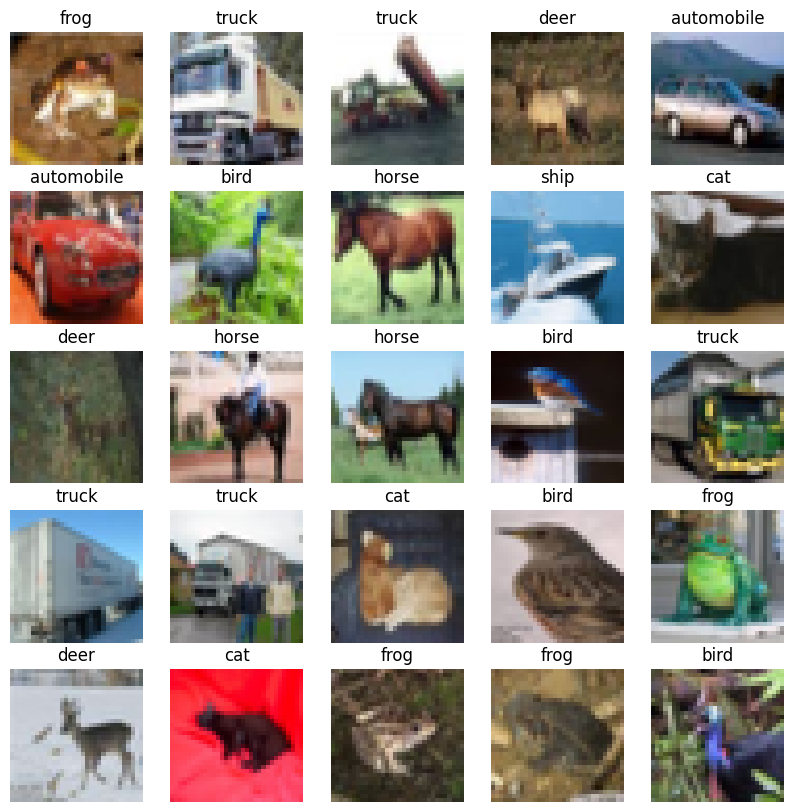

Epoch 1/10
782/782 [==============================] - 101s 126ms/step - loss: 1.7800 - accuracy: 0.3626 - val_loss: 1.7407 - val_accuracy: 0.3714
Epoch 2/10
782/782 [==============================] - 97s 124ms/step - loss: 1.5000 - accuracy: 0.4611 - val_loss: 1.5725 - val_accuracy: 0.4338
Epoch 3/10
782/782 [==============================] - 102s 130ms/step - loss: 1.3701 - accuracy: 0.5096 - val_loss: 3.2244 - val_accuracy: 0.2628
Epoch 4/10
782/782 [==============================] - 99s 127ms/step - loss: 1.2691 - accuracy: 0.5469 - val_loss: 1.3182 - val_accuracy: 0.5290
Epoch 5/10
782/782 [==============================] - 117s 150ms/step - loss: 1.1856 - accuracy: 0.5781 - val_loss: 1.5553 - val_accuracy: 0.4489
Epoch 6/10
782/782 [==============================] - 100s 127ms/step - loss: 1.1060 - accuracy: 0.6061 - val_loss: 1.4993 - val_accuracy: 0.4806
Epoch 7/10
782/782 [==============================] - 98s 125ms/step - loss: 1.0348 - accuracy: 0.6306 - val_loss: 1.4370 - va

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define class labels for CIFAR-10
class_labels = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Visualize a few example images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_labels[y_train[i][0]])
    plt.axis("off")
plt.show()

# Prepare the data for training
num_classes = len(class_labels)
input_shape = x_train.shape[1:]

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define a small Vision Transformer model
def create_vit_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Resize images to a smaller size to reduce computation
    resized_inputs = preprocessing.Rescaling(scale=0.25)(inputs)

    # Patch embedding layer
    patches = layers.Conv2D(64, kernel_size=3, strides=2, padding="same")(resized_inputs)
    patches = layers.BatchNormalization()(patches)
    patches = layers.Activation("swish")(patches)

    # Flattening patches
    patches = layers.Flatten()(patches)

    # MLP with two hidden layers
    mlp = layers.Dense(256, activation="swish")(patches)
    mlp = layers.Dropout(0.5)(mlp)
    mlp = layers.Dense(128, activation="swish")(mlp)
    mlp = layers.Dropout(0.5)(mlp)

    # Classification head
    outputs = layers.Dense(num_classes, activation="softmax")(mlp)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
model = create_vit_model(input_shape, num_classes)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
batch_size = 64
epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Evaluate the model on test data
_, test_acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test Accuracy:", test_acc)

# Classify a sample image
sample_image = x_test[0]
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension
predictions = model.predict(sample_image)
predicted_class = np.argmax(predictions[0])
print("Predicted Class:", class_labels[predicted_class])


In [ ]:
# Save the trained model weights
model.save_weights("vit_model_weights.h5")

Saving uikjnbv.jpg to uikjnbv.jpg
1/1 [==============================] - 0s 142ms/step


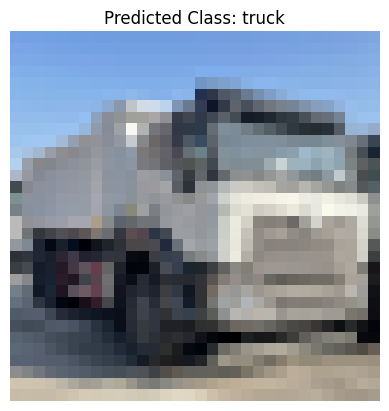

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the trained model
model = create_vit_model(input_shape, num_classes)
model.load_weights("vit_model_weights.h5")  # Replace with the path to your trained model weights

# Upload an image
uploaded_file = files.upload()
image_path = list(uploaded_file.keys())[0]

# Preprocess the uploaded image
image = Image.open(image_path).convert("RGB")
image = image.resize((32, 32))  # Resize the image to match the input shape of the model
image_array = np.array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Make predictions using the trained model
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_labels[predicted_class]

# Display the uploaded image and predicted label
plt.imshow(image)
plt.title("Predicted Class: " + predicted_label)
plt.axis("off")
plt.show()
